<div style="font-size:18pt; padding-top:20px; text-align:center"> ДОМАШНЕЕ ЗАДАНИЕ №2. <b>Выбор модели</b></div><hr>
<div style="text-align:right;">Поляков А.А. <span style="font-style: italic;font-weight: bold;">(Группа ИУ6-21М)</span></div>

<p>Подключение стилей оформления</p>

In [1]:
%%html
<link href="css/style.css" rel="stylesheet" type="text/css">

<a name="1"></a>
<div style="display:table; width:100%; padding-top:10px; padding-bottom:10px; border-bottom:1px solid lightgrey">
    <div style="display:table-row">
        <div style="display:table-cell; width:80%; font-size:14pt; font-weight:bold">Вариант 2</div>
</div>

In [2]:
surname = "Поляков"  # Ваша фамилия

alph = 'абвгдеёжзийклмнопрстуфхцчшщъыьэюя'
w = [4, 42, 21, 21, 34,  1, 44, 26, 18, 43, 38, 26, 18, 43,  3, 49, 45,
        7, 42, 25,  4,  9, 36, 33, 31, 29,  5, 31,  4, 19, 24, 27, 33]
d = dict(zip(alph, w))
variant =  sum([d[el] for el in surname.lower()]) % 2 + 1
print("Ваш вариант - ", variant)

Ваш вариант -  2


<a name="2"></a>
<div style="display:table; width:100%; padding-top:10px; padding-bottom:10px; border-bottom:1px solid lightgrey">
    <div style="display:table-row">
        <div style="display:table-cell; width:80%; font-size:14pt; font-weight:bold">Задание</div>
</div>

<p><b>Задача 1.</b> Регрессия + кросс-валидация</p>

<p>Дано множество наблюдений (файл "Reg_A5.csv"), регрессор - линейная регрессия. Найти степень полинома с минимальной ошибкой на проверочном подможестве, определить среднеквадратическую ошибку на тестовом подмножестве? (Степень полинома от 1 до 25)</p>
<p>
Построить графики:<br>
1) зависимости <b>среднеквадратической ошибки</b> от степени полинома для обучающего и проверочного подмножеств<br>
2) зависимости <b>R-квадрата</b> от степени полинома для обучающего и проверочного подмножеств<br>
3) функцию регрессии (наилучший случай) + исходные данные</p>

In [3]:
# Подключение библиотек
import pandas as pnd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.colors import ListedColormap
clrMap = ListedColormap(["blue", "red", "green"])

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from matplotlib import cm

import warnings
warnings.filterwarnings('ignore')

<p>1. Загрузка исходных данных</p>

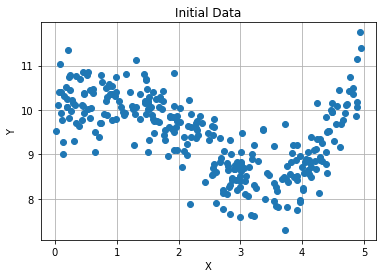

In [4]:
df = pnd.read_csv(r"C:\Users\Lab5UIVC505-506\Desktop\Assignments-master\data\A2_Model_Selection\Reg_A5.csv")

x = df.X.values
y = df.Y.values

plt.title("Initial Data")
plt.xlabel("X")
plt.ylabel("Y")
plt.plot(x, y, "o")
plt.grid(True)
plt.show()

<p>2. Формирование обучающего (train), проверочного (val) и тестового (test) подмножеств двумя способами</p>

In [13]:
# Способ 1
x_train_init, x_test, y_train_init, y_test = train_test_split(x.reshape(-1,1), y, test_size=0.3, random_state=0)
x_train, x_val, y_train, y_val = train_test_split(x_train_init, y_train_init, test_size=0.25, random_state=0)

# Способ 2
# Воспользоваться KFold с параметрами n_splits=4, shuffle=True, random_state=0
y_train_cv = []
y_val_cv = []
kf = KFold(n_splits=4, shuffle=True, random_state=0)
for train, test in kf.split(y_train_init):
    y_train_cv.append(y_train_init[train])
    y_val_cv.append(y_train_init[test])
    
x_train_cv = []
x_val_cv = []
kf = KFold(n_splits=4, shuffle=True, random_state=0)
for train, test in kf.split(x_train_init):
    x_train_cv.append(x_train_init[train])
    x_val_cv.append(x_train_init[test])
#print('Lenghts - train: %s, val: %s, test: %s \n' % (x[train][:150].size, x[train][150:225].size, x[test].size))
    

In [14]:
len(x_val_cv[0]) + len(x_train_cv[0])

210

<p>3. Обучение</p>

In [17]:
# Для способа 1
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from numpy.polynomial.polynomial import polyval

mse_trains = []
r2_trains = []
mse_vals = []
r2_vals = []

for i in range(1,26):
    pipeline = Pipeline([("plF", PolynomialFeatures(degree=i)), ("lr", LinearRegression(fit_intercept=True))])
    pipeline = pipeline.fit(x_train, y_train)
    f_pred = lambda x : polyval(x, pipeline.named_steps["lr"].coef_) + pipeline.named_steps["lr"].intercept_

    #Ошибки на обучающем подмножестве
    mse = mean_squared_error(y_train, f_pred(x_train).flatten())
    mse_trains.append(mse)
    r2 = pipeline.score(x_train, y_train)
    r2_trains.append(r2)
    
    #Ошибки на проверочном подмножестве
    y_pred_val = pipeline.predict(x_val)
    
    mse_val = mean_squared_error(y_val, y_pred_val)
    mse_vals.append(mse_val)
    
    r2_val = pipeline.score(x_val, y_val)
    r2_vals.append(r2_val)
    
# Для способа 2
# Для каждой степени полинома ошибка обучения:
# MeanErrorTrain = 1/4*(ErrorTrainFold_1+ErrorTrainFold_2+ErrorTrainFold_3+ErrorTrainFold_4)

# Для каждой степени полинома ошибка на проверочном подмножестве:
# MeanErrorValidation = 1/4*(ErrorValFold_1+ErrorValFold_2+ErrorValFold_3+ErrorValFold_4)

mse_cvs_t = []
r2_cvs_t = []
mse_cvs_v = []
r2_cvs_v = []

for i in range(1,26):
    mse_cvs = 0
    r2_cvs = 0
    mse_cvs_val = 0
    r2_cvs_val = 0
    for j in range(0,4):
        pipeline = Pipeline([("plF", PolynomialFeatures(degree=i)), ("lr", LinearRegression(fit_intercept=True))])
        pipeline = pipeline.fit(x_train_cv[j], y_train_cv[j])
        f_pred = lambda x : polyval(x, pipeline.named_steps["lr"].coef_) + pipeline.named_steps["lr"].intercept_
        
        #Ошибки на обучающем подмножестве
        mse_cv = mean_squared_error(y_train_cv[j], f_pred(x_train_cv[j]).flatten())
        mse_cvs += mse_cv
        
        r2_cv = pipeline.score(x_train_cv[j], y_train_cv[j])
        r2_cvs += r2_cv
        
        #Ошибки на проверочном подмножестве
        y_pred_val_cv = pipeline.predict(x_val_cv[j])
        mse_cv_val = mean_squared_error(y_val_cv[j], y_pred_val_cv)
        mse_cvs_val += mse_cv_val

        r2_cv_val = pipeline.score(x_val_cv[j], y_val_cv[j])
        r2_cvs_val += r2_cv_val

        
    mse_cvs_t.append(mse_cvs/4)
    r2_cvs_t.append(r2_cvs/4)
    
    mse_cvs_v.append(mse_cvs_val/4)
    r2_cvs_v.append(r2_cvs_val/4)
    
    

<p>4. Графики зависимости среднеквадратической ошибки от степени полинома для обучающего и проверочного подмножеств</p>

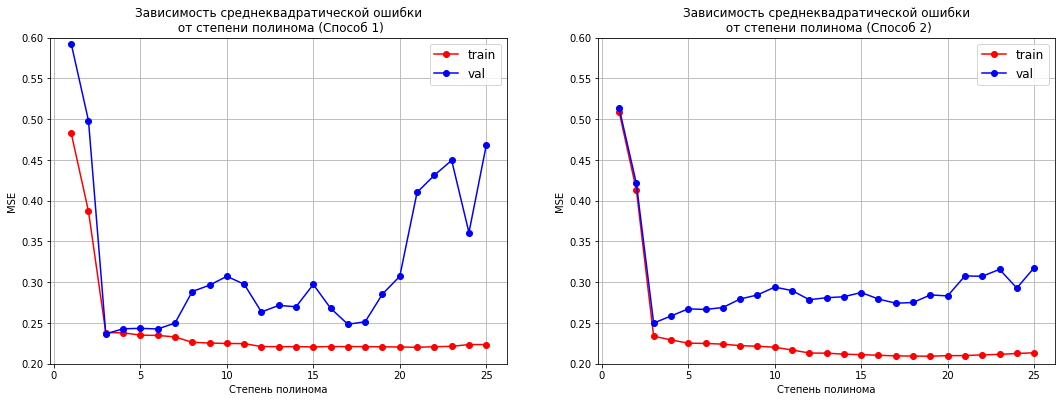

In [18]:
# Для способа 1

plt.figure("2",figsize=[18, 6])
plt.subplot(1,2,1)
plt.title("Зависимость среднеквадратической ошибки\n от степени полинома (Способ 1)")
plt.plot(range(1, 26), mse_trains, color="red", label="train", marker = 'o')
plt.plot(range(1, 26), mse_vals, color="blue", label="val", marker = 'o')
plt.ylim(0.2,0.6)
plt.xlabel("Cтепень полинома")
plt.ylabel("MSE")
plt.legend(loc=1, fontsize=12)
plt.grid(True)

# Для способа 2

plt.subplot(1,2,2)
plt.title("Зависимость среднеквадратической ошибки\n от степени полинома (Способ 2)")
plt.plot(range(1, 26), mse_cvs_t, color="red", label="train", marker = 'o')
plt.plot(range(1, 26), mse_cvs_v, color="blue", label="val", marker = 'o')
plt.ylim(0.2,0.6)
plt.xlabel("Cтепень полинома")
plt.ylabel("MSE")
plt.legend(loc=1, fontsize=12)
plt.grid(True)

<p>5. Графики зависимости R-квадрата от степени полинома для обучающего и проверочного подмножеств</p>

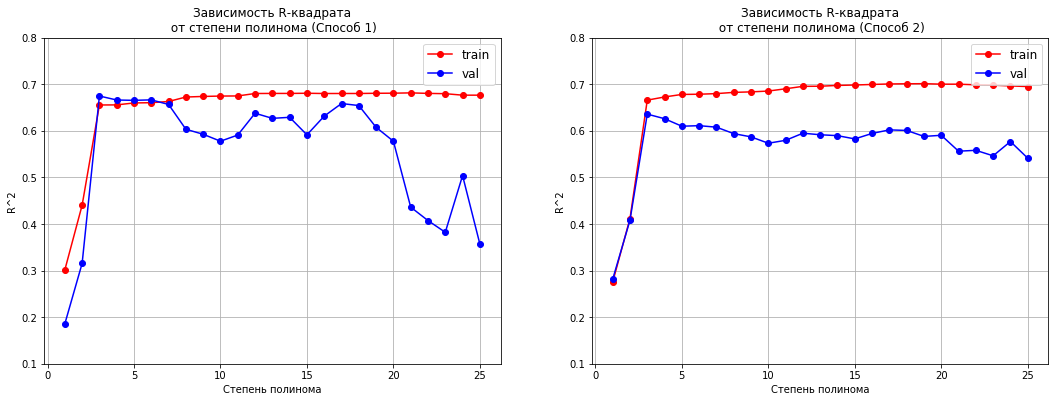

In [19]:
# Для способа 1

plt.figure("2",figsize=[18, 6])
plt.subplot(1,2,1)
plt.title("Зависимость R-квадрата\n от степени полинома (Способ 1)")
plt.plot(range(1, 26), r2_trains, color="red", label="train", marker = 'o')
plt.plot(range(1, 26), r2_vals, color="blue", label="val", marker = 'o')
plt.ylim(0.1,0.8)
plt.xlabel("Cтепень полинома")
plt.ylabel("R^2")
plt.legend(loc=1, fontsize=12)
plt.grid(True)

# Для способа 2

plt.subplot(1,2,2)
plt.title("Зависимость R-квадрата\n от степени полинома (Способ 2)")
plt.plot(range(1, 26), r2_cvs_t, color="red", label="train", marker = 'o')
plt.plot(range(1, 26), r2_cvs_v, color="blue", label="val", marker = 'o')
plt.ylim(0.1,0.8)
plt.xlabel("Cтепень полинома")
plt.ylabel("R^2")
plt.legend(loc=1, fontsize=12)
plt.grid(True)

<p>6. Выбор степени полинома + повторное обучение модели на train_init</p>

In [29]:
# Для способа 1

# Поиск степени с минимальной ошибкой 
for i in range(0, len(mse_vals)):
    if (mse_vals[i] <= min(mse_vals)):
        iminn1 = i
print("Способ 1\nНомер элемента с минимальной ошибкой  MSE: ", iminn1)

# Повторное обучение модели на train_init
pipeline1 = Pipeline([("plF", PolynomialFeatures(degree=iminn1 + 1)), ("lr", LinearRegression(fit_intercept=True))])
pipeline1 = pipeline1.fit(x_train_init, y_train_init)
f_pred = lambda x : polyval(x, pipeline1.named_steps["lr"].coef_) + pipeline1.named_steps["lr"].intercept_

# Для способа 2

# Поиск степени с минимальной ошибкой 
for i in range(0, len(mse_cvs_v)):
    if (mse_cvs_v[i] <= min(mse_cvs_v)):
        iminn2 = i
print("\nСпособ 2\nНомер элемента с минимальной ошибкой  MSE: ", iminn2)

# Повторное обучение модели на train_init
pipeline2 = Pipeline([("plF", PolynomialFeatures(degree=iminn2+1)), ("lr", LinearRegression(fit_intercept=True))])
pipeline2 = pipeline2.fit(x_train_init, y_train_init)
f_pred2 = lambda x : polyval(x, pipeline2.named_steps["lr"].coef_) + pipeline2.named_steps["lr"].intercept_


Способ 1
Номер элемента с минимальной ошибкой  MSE:  2

Способ 2
Номер элемента с минимальной ошибкой  MSE:  2


<p>7. Cреднеквадратическая ошибка на тестовом подмножестве</p>

In [31]:
# Для способа 1
y_pred_val = pipeline1.predict(x_test)
mse_test = mean_squared_error(y_test, y_pred_val)
print("Cреднеквадратическая ошибка на тестовом подмножестве (Способ 1)\nMSE: ", mse_test)\

# Для способа 2
mse_test_cv = []
for j in range(0,4):
    mse_test_cv.append(mean_squared_error(y_test, pipeline2.predict(x_test)))
print("Cреднеквадратическая ошибка на тестовом подмножестве (Способ 2)\nMSE: ", sum(mse_test_cv)/len(mse_test_cv))

# for i in range(0, len(mse_test_cv)):
#     if (mse_test_cv[i] <= min(mse_test_cv)):
#         imint = i
#         #f_pred2_min = f_pred2[i]

# print("Cреднеквадратическая ошибка на тестовом подмножестве (Лучший результат) (Способ 2)\nMSE: ", min(mse_test_cv), ", Индекс выборки: ", imint)    

Cреднеквадратическая ошибка на тестовом подмножестве (Способ 1)
MSE:  0.22297660572404251
Cреднеквадратическая ошибка на тестовом подмножестве (Способ 2)
MSE:  0.22297660572404251


<p>8. График функции регрессии (наилучший случай) + исходные данные</p>

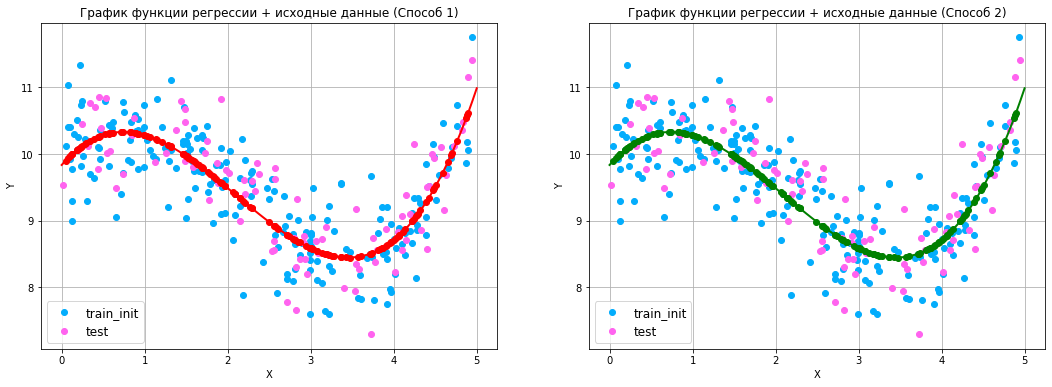

In [32]:
# Для способа 1

xx = np.linspace(0,5,100)

plt.figure(1, figsize=[18, 6])

# Для способа 1
plt.subplot(1,2,1)
plt.title("График функции регрессии + исходные данные (Способ 1)")
plt.plot(x_train_init, y_train_init, "o", color = "#03adfc", label = "train_init")
plt.plot(x_test, y_test, "o", color = "#ff63ef", label = "test")
plt.plot(xx, f_pred(xx), color="red", lw=2)
plt.plot(x_train, f_pred(x_train), "o", color="red", lw=2)
plt.xlabel("X")
plt.ylabel("Y")
plt.legend(loc=3, fontsize=12)
plt.grid(True)

# Для способа 2
plt.subplot(1,2,2)
plt.title("График функции регрессии + исходные данные (Способ 2)")
plt.plot(x_train_init, y_train_init, "o", color = "#03adfc", label = "train_init")
plt.plot(x_test, y_test, "o", color = "#ff63ef", label = "test")
plt.plot(xx, f_pred2(xx), color="green", lw=2)
plt.plot(x_train, f_pred2(x_train), "o", color="green", lw=2)
plt.xlabel("X")
plt.ylabel("Y")
plt.legend(loc=3, fontsize=12)
plt.grid(True)

<p>9. Сравнение результатов для различных способов</p>

In [34]:
print("\nMSE на тестовой выборке (Способ 1): ", mean_squared_error(y_test, pipeline1.predict(x_test)))
print("MSE на тестовой выборке (Способ 2): ", mean_squared_error(y_test, pipeline2.predict(x_test)))

print("\nR^2 на тестовой выборке (Способ 1): ", pipeline1.score(x_test, y_test))
print("R^2 на тестовой выборке (Способ 2): ", pipeline2.score(x_test, y_test))



MSE на тестовой выборке (Способ 1):  0.22297660572404251
MSE на тестовой выборке (Способ 2):  0.22297660572404251

R^2 на тестовой выборке (Способ 1):  0.7105706945726982
R^2 на тестовой выборке (Способ 2):  0.7105706945726982


<p><b>Задача 2.</b> Классификация + кросс-валидация</p>

<p>Дано множество наблюдений (файл "Cl_A5_Vx.csv"), классификатор - логистическая регрессия. Найти степень полинома с минимальной ошибкой на проверочном подможестве, определить долю правильных классификаций на тестовом подмножестве?</p>
<p>
Построить графики:<br>
1) зависимости доли правильных классификаций от <b>степени полинома</b> для обучающего и проверочного подмножеств<br>
2) зависимости доли правильных классификаций от <b>количества итераций</b> для обучающего и проверочного подмножеств для наилучшего случая<br>
3) результат классификации для наилучшего случая (степень полинома) для обучающего и проверочного подмножеств</p>
4) результат классификации для тестового подмножества</p>

<p>1. Загрузка исходных данных</p>

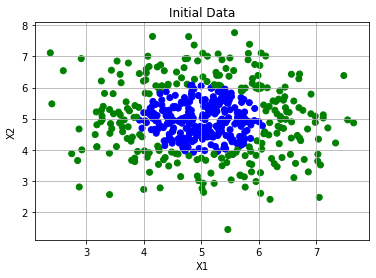

In [36]:
df = pnd.read_csv(r"C:\Users\Lab5UIVC505-506\Desktop\Assignments-master\data\A2_Model_Selection\Cl_A5_V"+str(2)+".csv")  # variant - вариант задания

plt.title("Initial Data")
plt.xlabel("X1")
plt.ylabel("X2")
plt.scatter(df.X1, df.X2, c=df.Y, cmap=clrMap)
plt.grid(True)
plt.show()

In [37]:
x1 = df.X1.values.reshape(-1,1)
x2 = df.X2.values.reshape(-1,1)
x = np.random.rand(len(x1),2)
y = df.Y.values
for i in range(0,len(x1)):
    x[i][0] = x1[i]
    x[i][1] = x2[i]

<p>2. Формирование обучающего (train), проверочного (val) и тестового (test) подмножеств</p>

In [170]:
# Способ 1
x_train_init, x_test, y_train_init, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
x_train, x_val, y_train, y_val = train_test_split(x_train_init, y_train_init, test_size=0.25, random_state=0)

# Способ 2
y_train_cv = []
y_train_init_cv = []
y_val_cv = []
y_test_cv = []
kf = KFold(n_splits=4, shuffle=True, random_state=0)
for train, test in kf.split(y):
    y_train_cv.append(y[train][:int(len(train)*2/3)])
    y_val_cv.append(y[train][int(len(train)*2/3):int(len(train))])
    y_train_init_cv.append(y[train])
    y_test_cv.append(y[test])
    
x_train_cv = []
x_train_init_cv = []
x_val_cv = []
x_test_cv = []
kf = KFold(n_splits=4, shuffle=True, random_state=0)
for train, test in kf.split(x):
    x_train_cv.append(x[train][:int(len(train)*2/3)])
    x_val_cv.append(x[train][int(len(train)*2/3):int(len(train))])
    x_train_init_cv.append(x[train])
    x_test_cv.append(x[test])

<p>3. Обучение</p>

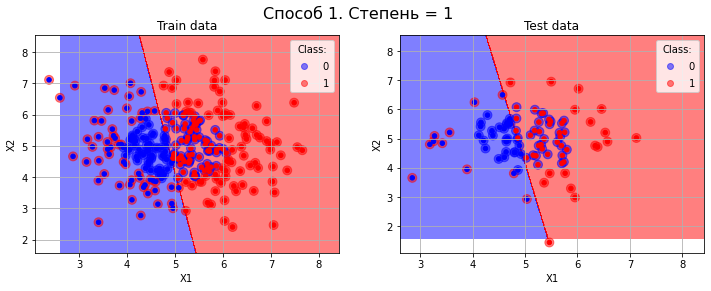

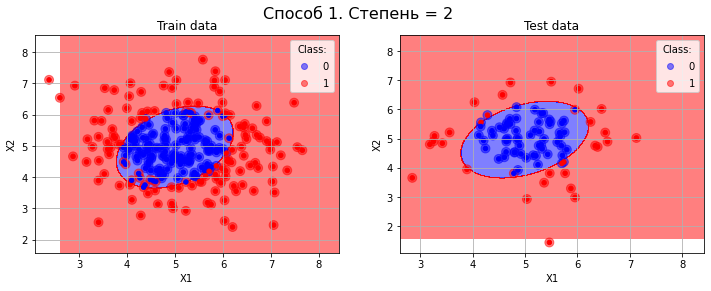

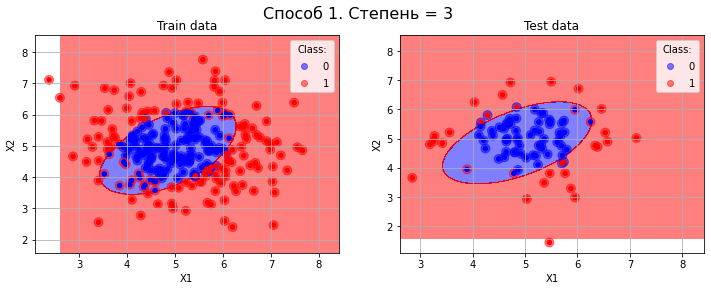

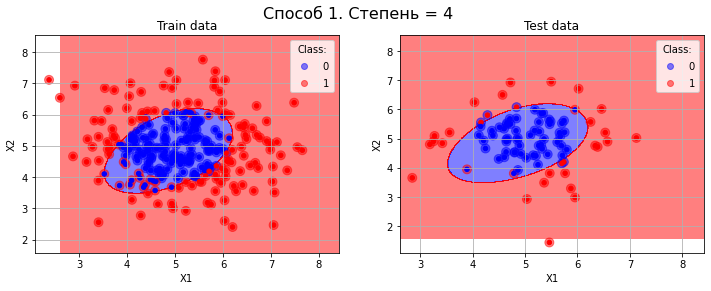

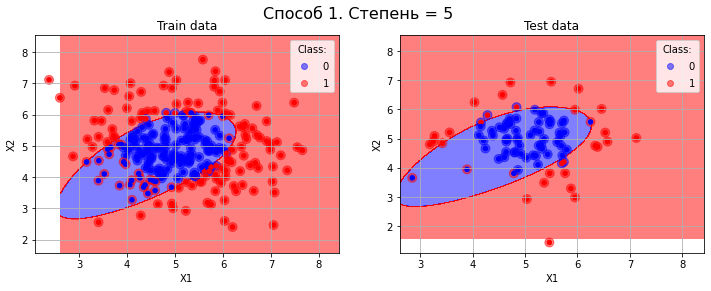

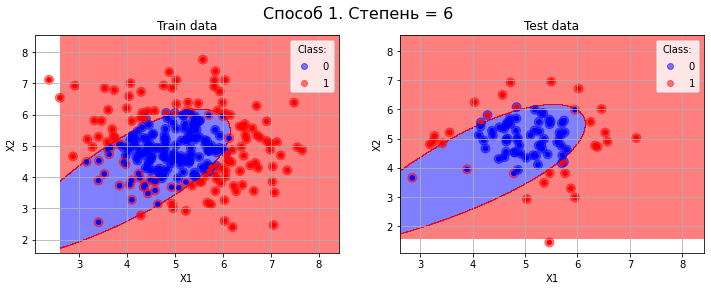

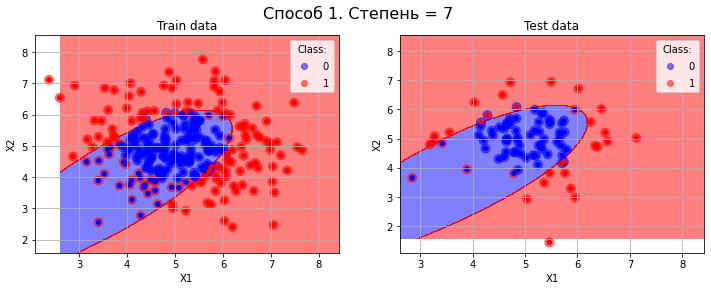

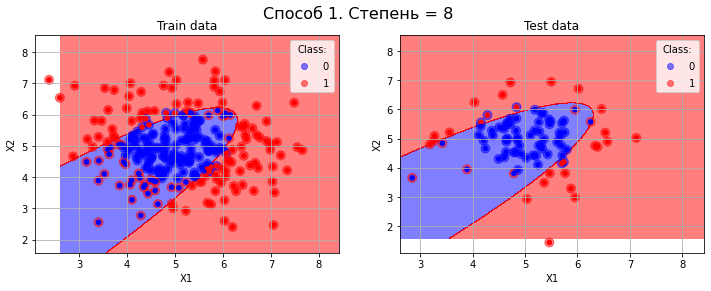

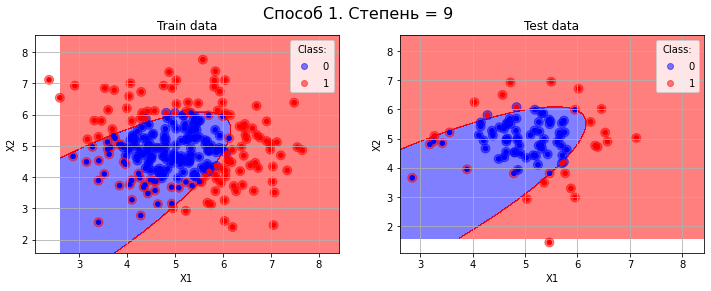

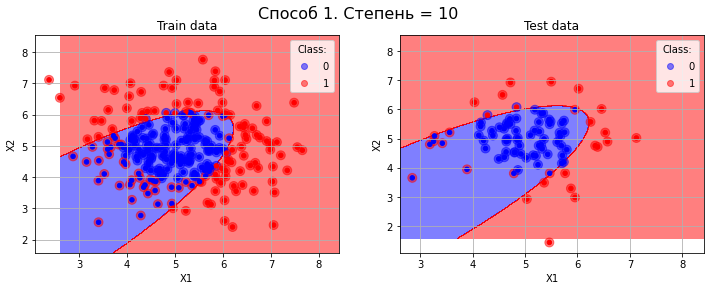

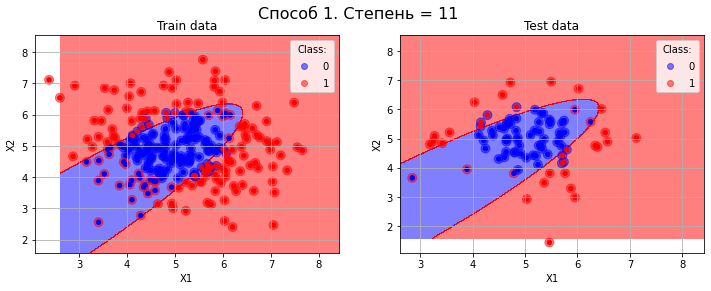

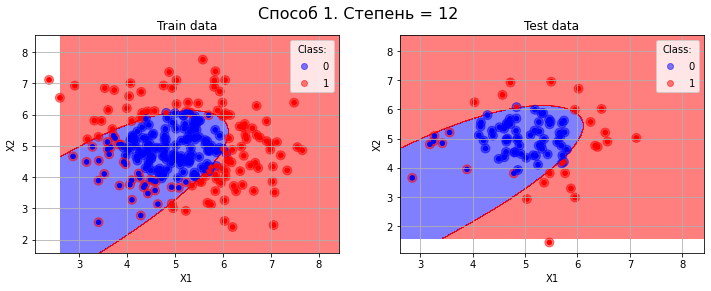

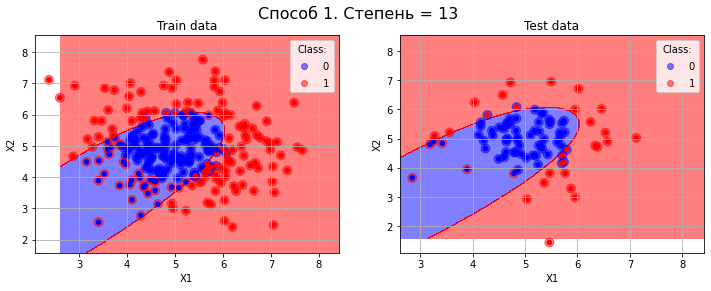

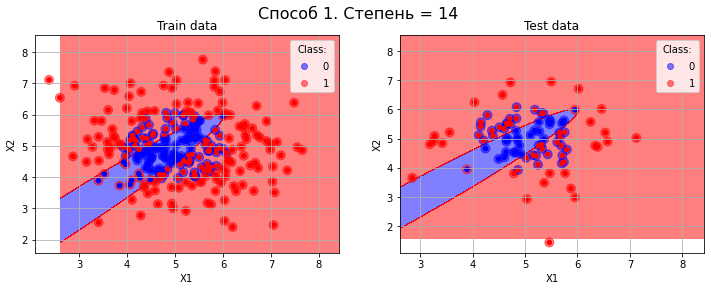

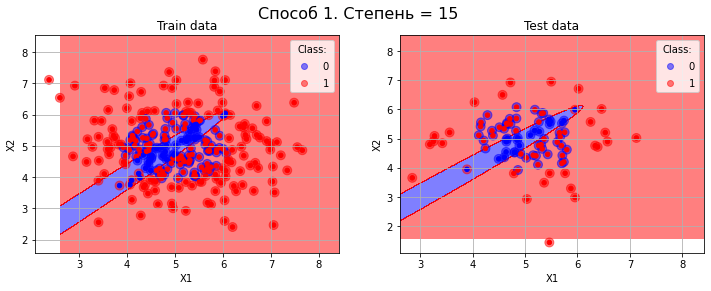

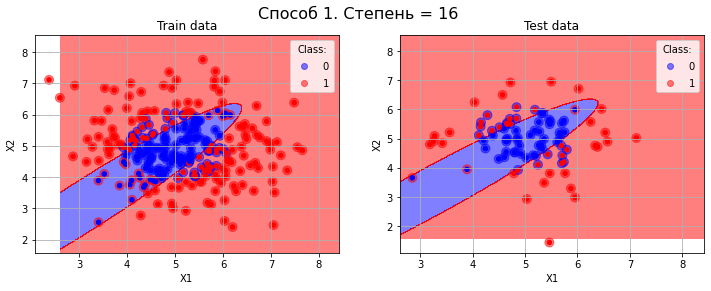

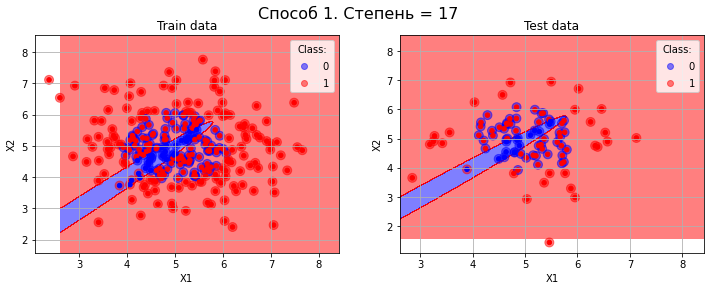

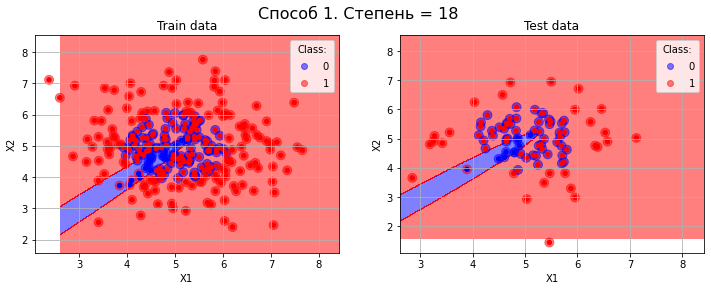

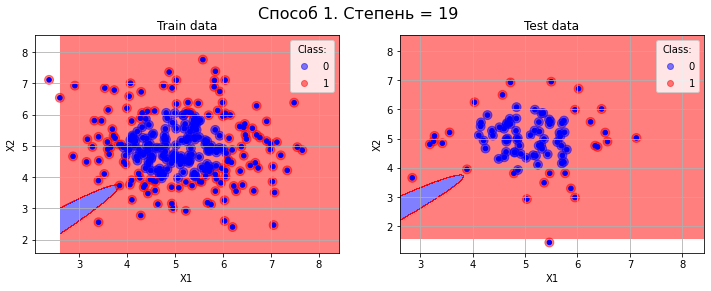

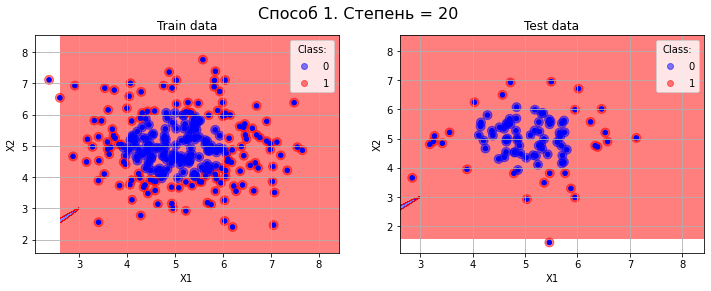

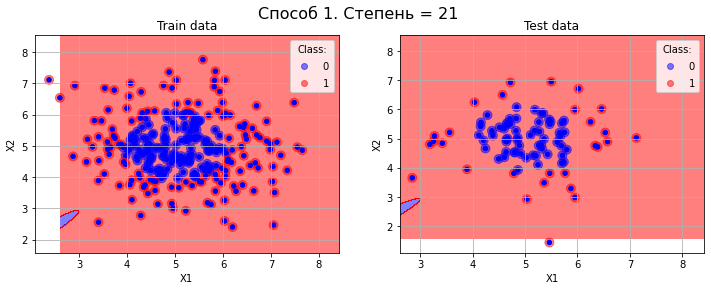

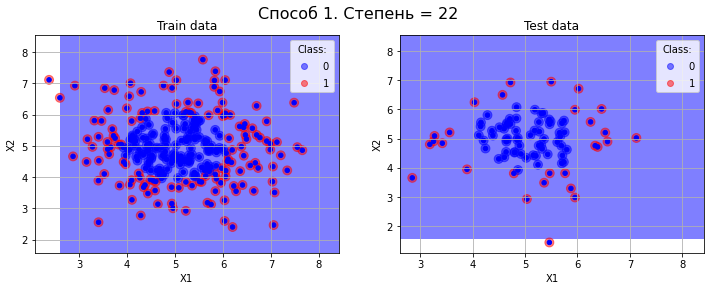

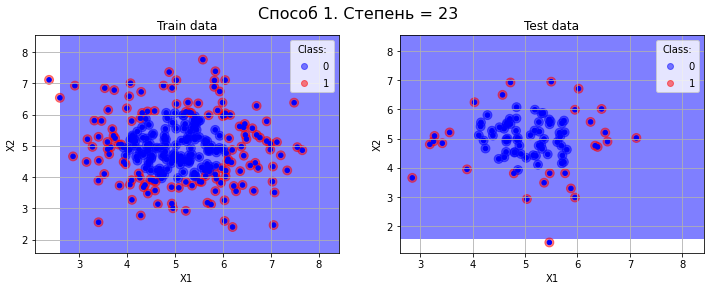

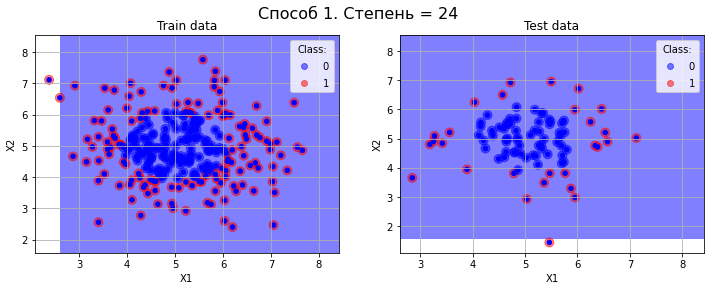

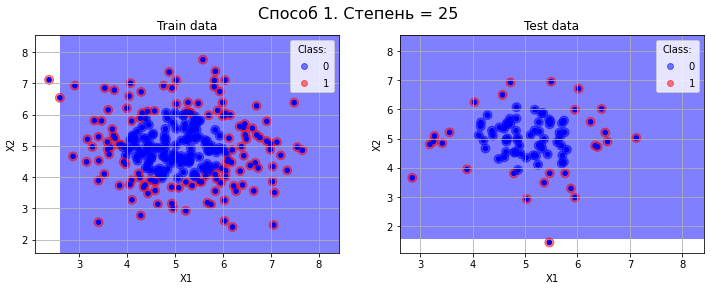

In [171]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
import sys
sys.path.insert(0, r"C:\Users\Yoda\Desktop\Practice-master\Practice-master\lib")
from plot_utils import CPlot, RPlot

# Параметры классификатора
# penalty="l2", fit_intercept=True, max_iter=x, C=1e5, solver="liblinear", random_state=12345

# Для способа 1
score_logreg_model_train = []
score_logreg_model_val = []
for i in range(1,26):
    pipeline = Pipeline([("plF", PolynomialFeatures(degree=i)), ("lr", LogisticRegression(penalty="l2", fit_intercept=True, max_iter=10, C=1e5, solver="liblinear", random_state=12345))])
    pipeline1 = pipeline.fit(x_train, y_train)
    
    #f_pred = lambda x: 1 / (1 + np.exp(-(logr_model.intercept_+logr_model.coef_[0]*x)))

    # Оценка на обучающем подмножестве
    score_logreg_model_train.append(pipeline1.score(x_train, y_train))
    
    # Оценка на проверочном подмножестве
    score_logreg_model_val.append(pipeline1.score(x_val, y_val))
    
    CLR_MAP = ListedColormap(["blue", "red"])
    CPlot.show_train_test_plots(pipeline, x_train, y_train, x_val, y_val, 
                            title="Способ 1. Степень = " + str(i), cmap=CLR_MAP)

# Для способа 2
train_scores = []
val_scores = []

for i in range(1,26):
    scores_t = 0
    scores_v = 0
    for j in range(0,4):
        pipeline = Pipeline([("plF", PolynomialFeatures(degree=i)), ("lr", LogisticRegression(penalty="l2", fit_intercept=True, max_iter=10, C=1e5, solver="liblinear", random_state=12345))])
        pipeline = pipeline.fit(x_train_cv[j], y_train_cv[j])
        
        # Оценка на обучающем подмножестве
        score_t = pipeline.score(x_train_cv[j], y_train_cv[j])
        scores_t += score_t
        
        # Оценка на проверочном подмножестве
        score_v = pipeline.score(x_val_cv[j], y_val_cv[j])
        scores_v += score_v
        
    train_scores.append(scores_t/4)
    val_scores.append(scores_v/4)

<p>4. Графики зависимости доли правильных классификаций от степени полинома для обучающего и проверочного подмножеств</p>

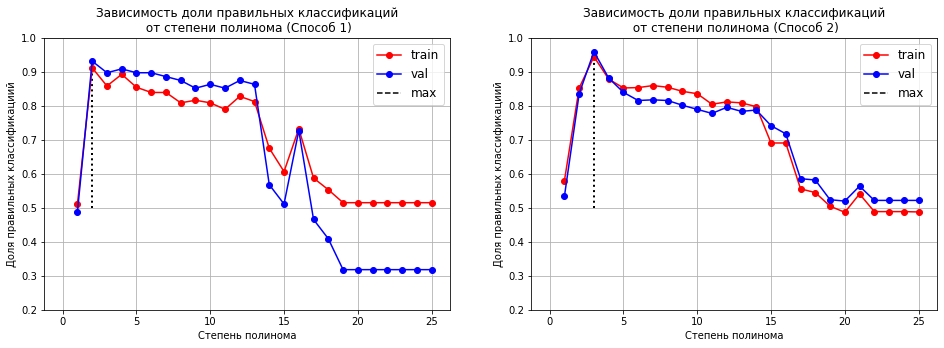

In [172]:
for i in range(0, len(score_logreg_model_train)):
    if (score_logreg_model_train[i] >= max(score_logreg_model_train)):
        imax1 = i

for i in range(0, len(train_scores)):
    if (train_scores[i] >= max(train_scores)):
        imax2 = i

# Для способа 1
plt.figure("2",figsize=[16, 5])
plt.subplot(1,2,1)
plt.title("Зависимость доли правильных классификаций\n от степени полинома (Способ 1)")
plt.plot(range(1, 26), score_logreg_model_train, color="red", label="train", marker = 'o')
plt.plot(range(1, 26), score_logreg_model_val, color="blue", label="val", marker = 'o')
plt.plot(0, 0, color="black", label="max", linestyle='--')
plt.ylim(0.2,1)
plt.xlabel("Cтепень полинома")
plt.ylabel("Доля правильных классификациий")
plt.legend(loc=1, fontsize=12)
plt.vlines(imax1+1, ymin=0.5, ymax=max(score_logreg_model_train), colors="black", linestyles="dotted", lw=2)
plt.grid(True)

# Для способа 2
plt.subplot(1,2,2)
plt.title("Зависимость доли правильных классификаций\n от степени полинома (Способ 2)")
plt.plot(range(1, 26), train_scores, color="red", label="train", marker = 'o')
plt.plot(range(1, 26), val_scores, color="blue", label="val", marker = 'o')
plt.plot(0, 0, color="black", label="max", linestyle='--')
plt.ylim(0.2,1)
plt.xlabel("Cтепень полинома")
plt.ylabel("Доля правильных классификациий")
plt.legend(loc=1, fontsize=12)
plt.vlines(imax2+1, ymin=0.5, ymax=max(train_scores), colors="black", linestyles="dotted", lw=2)
plt.grid(True)

<p>5. Графики зависимости доли правильных классификаций от количества итераций для обучающего (train) и проверочного подмножеств для наилучшего случая - изменение параметра max_iter</p>

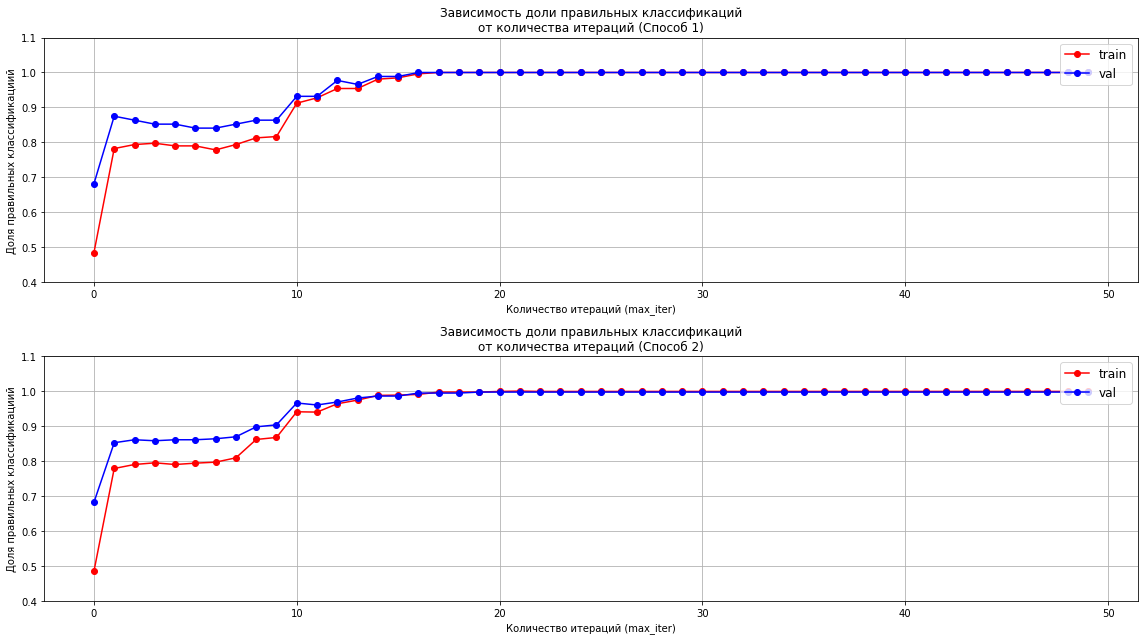

In [173]:
# Для способа 1
score_train1 = []
score_val1 = []
for i in range(0, 50):
    pipeline = Pipeline([("plF", PolynomialFeatures(degree=imax1+ 1 )), ("lr", LogisticRegression(penalty="l2", fit_intercept=True, max_iter=i, C=1e5, solver="liblinear", random_state=12345))])
    pipeline1 = pipeline.fit(x_train, y_train)

    # Оценка на обучающем подмножестве
    score_train1.append(pipeline1.score(x_train, y_train))

    # Оценка на проверочном подмножестве
    score_val1.append(pipeline1.score(x_val, y_val))

plt.figure("3",figsize=[16, 9])
plt.subplot(2,1,1)
plt.title("Зависимость доли правильных классификаций\nот количества итераций (Способ 1)")
plt.plot(range(0, 50), score_train1, color="red", label="train", marker = 'o')
plt.plot(range(0, 50), score_val1, color="blue", label="val", marker = 'o')
plt.ylim(0.4,1.1)
plt.xlabel("Количество итераций (max_iter)")
plt.ylabel("Доля правильных классификациий")
plt.legend(loc=1, fontsize=12)
plt.grid(True)

# Для способа 2
score_train2 = []
score_val2 = []
for i in range(0, 50):
    score_train2_j = []
    score_val2_j = []
    for j in range(0,4):
        pipeline = Pipeline([("plF", PolynomialFeatures(degree=imax2+ 1 )), ("lr", LogisticRegression(penalty="l2", fit_intercept=True, max_iter=i, C=1e5, solver="liblinear", random_state=12345))])
        pipeline2 = pipeline.fit(x_train_cv[j], y_train_cv[j])
        
        # Оценка на обучающем подмножестве
        score_train2_j.append(pipeline2.score(x_train, y_train))

        # Оценка на проверочном подмножестве
        score_val2_j.append(pipeline2.score(x_val, y_val))
    
    # Оценка на обучающем подмножестве
    score_train2.append(sum(score_train2_j)/len(score_train2_j))

    # Оценка на проверочном подмножестве
    score_val2.append(sum(score_val2_j)/len(score_val2_j))

plt.subplot(2,1,2)
plt.title("Зависимость доли правильных классификаций\nот количества итераций (Способ 2)")
plt.plot(range(0, 50), score_train2, color="red", label="train", marker = 'o')
plt.plot(range(0, 50), score_val2, color="blue", label="val", marker = 'o')
plt.ylim(0.4,1.1)
plt.xlabel("Количество итераций (max_iter)")
plt.ylabel("Доля правильных классификациий")
plt.legend(loc=1, fontsize=12)
plt.grid(True)
plt.tight_layout()

<p>6. Повторное обучение на train_init наилучшей модели по данным из пункта 4</p>

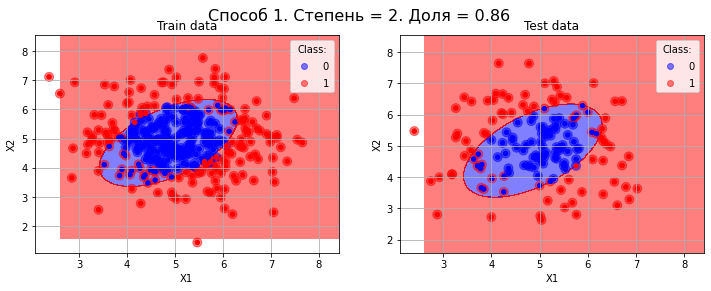

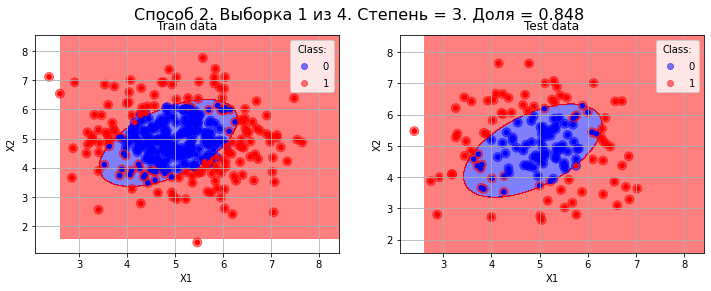

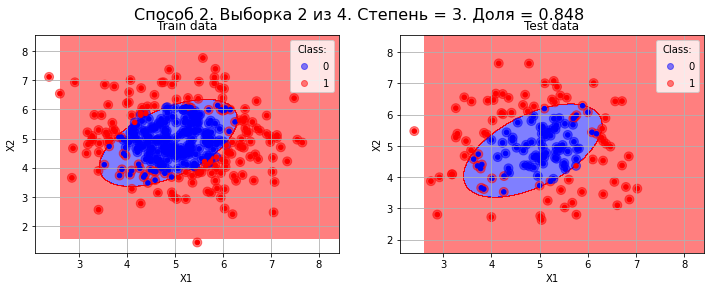

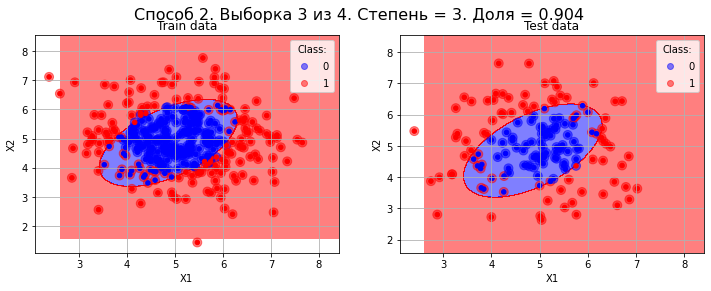

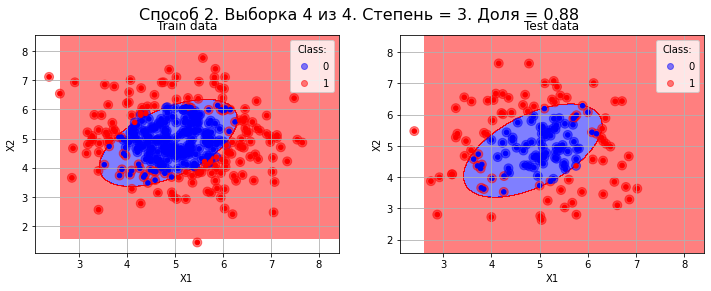

In [174]:
# Для способа 1
pipeline = Pipeline([("plF", PolynomialFeatures(degree=imax1+1)), ("lr", LogisticRegression(penalty="l2", fit_intercept=True, max_iter=10, C=1e5, solver="liblinear", random_state=12345))])
pipeline1 = pipeline.fit(x_train_init, y_train_init)

# Оценка на тестовом подмножестве
score_test1 = pipeline1.score(x_test, y_test)

CPlot.show_train_test_plots(pipeline1, x_train_init, y_train_init, x_test, y_test, 
                            title="Способ 1. Степень = " + str(imax1+1) + ". Доля = " + str(score_test1), cmap=CLR_MAP)

# Для способа 2
score_test2_j = []
for j in range(0,4):
    pipeline = Pipeline([("plF", PolynomialFeatures(degree=imax2+1)), ("lr", LogisticRegression(penalty="l2", fit_intercept=True, max_iter=10, C=1e5, solver="liblinear", random_state=12345))])
    pipeline2 = pipeline.fit(x_train_cv[j], y_train_cv[j])
    
    
    score_test2_j.append(pipeline1.score(x_test_cv[j], y_test_cv[j]))
    
    CPlot.show_train_test_plots(pipeline1, x_train_init, y_train_init, x_test, y_test, 
                            title="Способ 2. Выборка " + str(j + 1) + " из 4. Степень = " + str(imax2+1) + ". Доля = " + str(score_test2_j[j]), cmap=CLR_MAP)

<p><b>Задача 3.</b> Регрессия + регуляризация</p>

<p>1. Загрузка исходных данных</p>

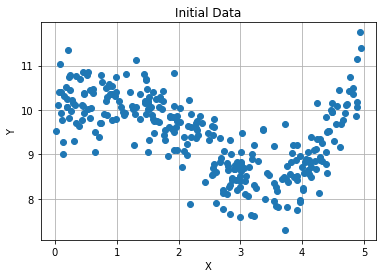

In [175]:
df = pnd.read_csv(r"C:\Users\Yoda\Desktop\Assignments-master\data\A2_Model_Selection\Reg_A5.csv")

x = df.X.values
y = df.Y.values

plt.title("Initial Data")
plt.xlabel("X")
plt.ylabel("Y")
plt.plot(x, y, "o")
plt.grid(True)
plt.show()

<p>2. Обучение с кросс-валидацией (см. задачу 1 способ 2) и с использованием Ridge при различных значениях коэф. регуляризации</p>

In [176]:
from sklearn.linear_model import Ridge

# Формирование train, val, test наборов
y_train = []
y_train_init = []
y_val = []
y_test = []
kf = KFold(n_splits=4, shuffle=True, random_state=0)
for train, test in kf.split(y):
    y_train.append(y[train][:int(len(train)*2/3)])
    y_val.append(y[train][int(len(train)*2/3):int(len(train))])
    y_train_init.append(y[train])
    y_test.append(y[test])
    
x_train = []
x_train_init = []
x_val = []
x_test = []
kf = KFold(n_splits=4, shuffle=True, random_state=0)
for train, test in kf.split(x.reshape(-1,1)):
    x_train.append(x.reshape(-1,1)[train][:int(len(train)*2/3)])
    x_val.append(x.reshape(-1,1)[train][int(len(train)*2/3):int(len(train))])
    x_train_init.append(x.reshape(-1,1)[train])
    x_test.append(x.reshape(-1,1)[test])


# Регрессор - Ridge
# Параметры: a fit_intercept=True, normalize=True, random_state=12345
# Здесь и далее СТЕПЕНЬ ПОЛИНОМА - 16!!!

# Коэф. регуляризации
alphas = np.append([0.0], np.logspace(-8, 1, 20, base=10))

mses_t = []
mses_v = []
r2s_t = []
r2s_v = []
for alph in alphas:
    pl_reg = Pipeline([("plF", PolynomialFeatures(degree=16)), ("lr", Ridge(alpha=alph, 
                                                                        normalize=True, 
                                                                        fit_intercept=True))])
    mse_t = []
    mse_v = []
    r2_t = []
    r2_v = []
    for i in range(0,len(y_train)):
        pl_reg = pl_reg.fit(x_train[i], y_train[i])
        
        # Ошибка на обучающем подмножестве
        mse_t.append(mean_squared_error(y_train[j], pl_reg.predict(x_train[j])))
        
        # Ошибка на проверочном подмножестве
        mse_v.append(mean_squared_error(y_val[j], pl_reg.predict(x_val[j])))
        
        # Оценка на обучающем подмножестве
        r2_t.append(pl_reg.score(x_train[j], y_train[j]))
        
        # Оценка на проверочном подмножестве
        r2_v.append(pl_reg.score(x_val[j], y_val[j]))
        
    mses_t.append(sum(mse_t)/len(mse_t))
    mses_v.append(sum(mse_v)/len(mse_v))
    r2s_t.append(sum(r2_t)/len(r2_t))
    r2s_v.append(sum(r2_v)/len(r2_v))

<p>3. Графики зависимости среднеквадратической ошибки от коэффициента регуляризации для обучающего и проверочного подмножеств</p>

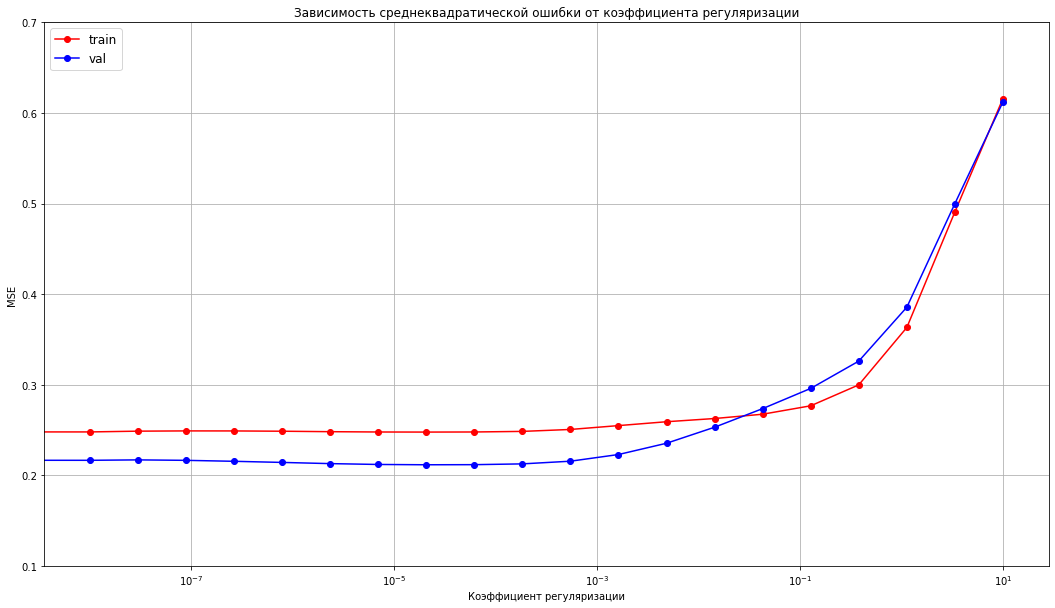

In [177]:
plt.figure("2",figsize=[18, 10])
plt.subplot(1,1,1)
plt.title("Зависимость среднеквадратической ошибки от коэффициента регуляризации")
plt.plot(alphas, mses_t, color="red", label="train", marker = 'o')
plt.plot(alphas, mses_v, color="blue", label="val", marker = 'o')
plt.xscale("log")
plt.ylim(0.1,0.7)
plt.xlabel("Коэффициент регуляризации")
plt.ylabel("MSE")
plt.legend(loc=2, fontsize=12)
plt.grid(True)

<p>4. Графики зависимости R-квадрата от коэффициента регуляризации для обучающего и проверочного подмножеств</p>

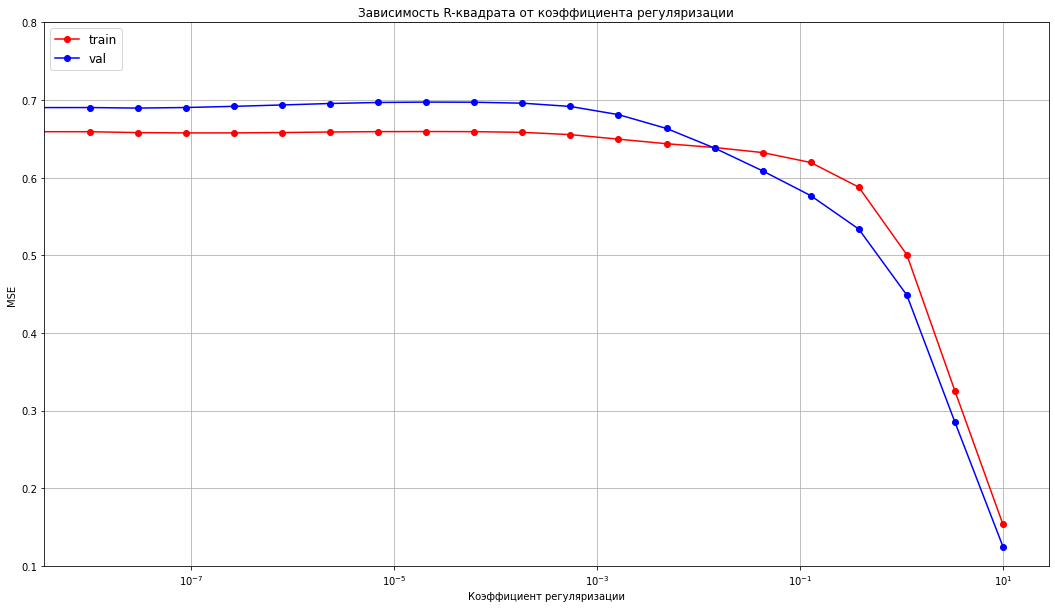

In [178]:
plt.figure("2",figsize=[18, 10])
plt.subplot(1,1,1)
plt.title("Зависимость R-квадрата от коэффициента регуляризации")
plt.plot(alphas, r2s_t, color="red", label="train", marker = 'o')
plt.plot(alphas, r2s_v, color="blue", label="val", marker = 'o')
plt.xscale("log")
plt.ylim(0.1,0.8)
plt.xlabel("Коэффициент регуляризации")
plt.ylabel("MSE")
plt.legend(loc=2, fontsize=12)
plt.grid(True)

<p>5. Найти коэф. рег. с минимальной ошибкой на val</p>

In [179]:
min_mse = score_logreg_model_train[0]
imin_mse = 0
for i in range(0, len(mses_v)):
    if (mses_v[i] <= min(mses_v)):
        imin_mse = i
        min_mse = mses_v[i]
print("Коэф. рег. с минимальной ошибкой на val: " + str(alphas[imin_mse]))

Коэф. рег. с минимальной ошибкой на val: 2.06913808111479e-05


<p>8. Обучение на train_init с использованием Ridge и параметром alpha=(значение из пункта 2)</p>

In [180]:
pl_reg = Pipeline([("plF", PolynomialFeatures(degree=16)), ("lr", Ridge(alpha=alphas[imin_mse], 
                                                                        normalize=True, 
                                                                        fit_intercept=True))])
pl_regs = []
for i in range(0,len(y_train)):
        pl_reg = pl_reg.fit(x_train_init[i], y_train_init[i])
        pl_regs.append(pl_reg)

<p>9. Определить ошибку на тестовом подмножестве</p>

In [181]:
mses = []
for j in range(0,len(y_train)):
    pl_reg = pl_regs[j]
    mses.append(mean_squared_error(y_test[j], pl_reg.predict(x_test[j])))
    
print("Ошибки в выборке: " + str(mses))
print("Средняя ошибка: " + str(sum(mses)/len(mses)))

for i in range(0, len(mses)):
    if (mses[i] <= min(mses)):
        imin_error = i

print("Минимальная ошибка: " + str(mses[imin_error]) + ". Выборка " + str(imin_error + 1) + " из 4")

Ошибки в выборке: [0.21140272527620374, 0.22529553215294087, 0.2514232761584584, 0.21967748534026935]
Средняя ошибка: 0.22694975473196807
Минимальная ошибка: 0.21140272527620374. Выборка 1 из 4


<p>10. Построить график регрессии</p>

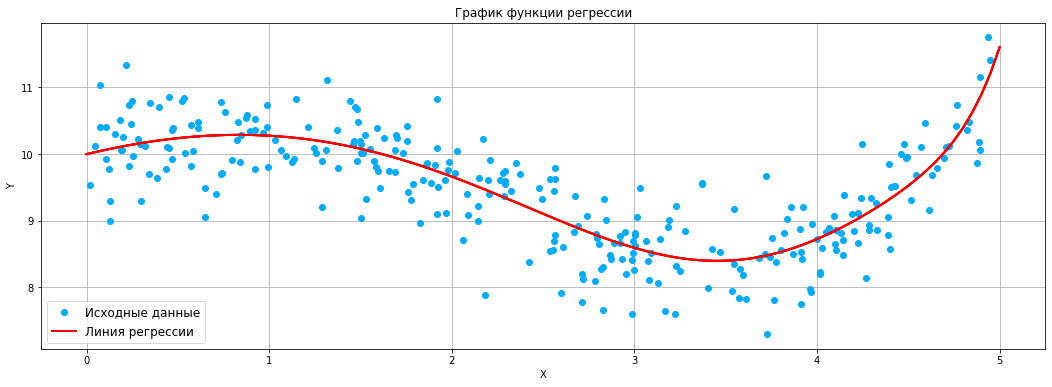

In [182]:
xx = np.linspace(0,5,100)

plt.figure(1, figsize=[18, 6])

plt.subplot(1,1,1)
plt.title("График функции регрессии")
plt.plot(x, y, "o", color = "#03adfc", label = "Исходные данные")
#plt.plot(x_test, y_test, "o", color = "#ff63ef", label = "test")

label_name = ""
for i in range(0,len(y_train)):
    if (i >= 3): 
         label_name = "Линия регрессии"
    plt.plot(xx.reshape(-1,1), pl_regs[i].predict(xx.reshape(-1,1)), color="red", lw=2, label = label_name)
plt.xlabel("X")
plt.ylabel("Y")
plt.legend(loc=3, fontsize=12)
plt.grid(True)

<p>11. Сделать заключение о влиянии коэффициента регуляризации</p>

In [183]:
print("Подбор коэффициента регуляризации на проверочном этапе позволяет увеличить точность модели на этапе тестирования")

Подбор коэффициента регуляризации на проверочном этапе позволяет увеличить точность модели на этапе тестирования
